# Sample problems from the book
## References:
- https://scikit-learn.org/stable/modules/linear_model.html

## Set up Seaborn and import Iris data set

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Plot iris data elements

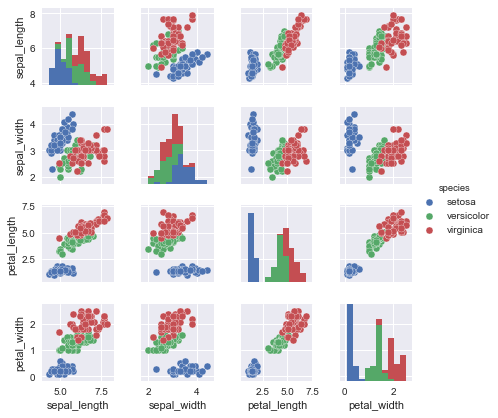

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

## Extract Feature Set

In [3]:
x_iris = iris.drop('species',axis=1)
x_iris.shape

(150, 4)

In [4]:
x_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Extract Target

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

In [6]:
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

# Supervised Learning:
# Simple Linear Regression

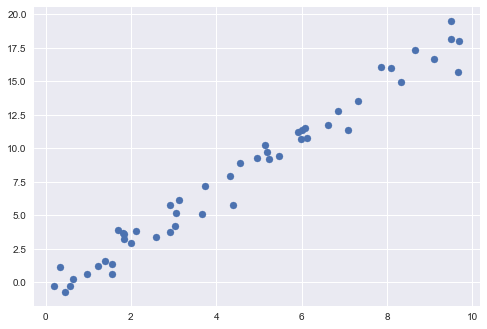

In [13]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x -1 + rng.randn(50)
plt.scatter(x,y);

In [14]:
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept='True')

In [16]:
X = x[:,np.newaxis]
X.shape

(50, 1)

In [17]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept='True', n_jobs=1, normalize=False)

In [18]:
print('The intercept is:')
print(model.intercept_)
print('The coefficient is:')
print(model.coef_)

The intercept is:
-0.903310725531111
The coefficient is:
[1.9776566]


In [19]:
xfit = np.linspace(-1,11)
xfit = xfit[:,np.newaxis]
yfit = model.predict(xfit)

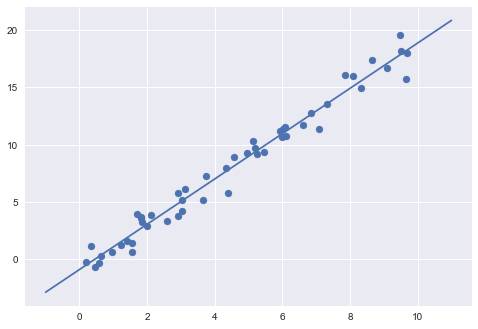

In [20]:
plt.scatter(x,y)
plt.plot(xfit,yfit);

In [21]:
plt.show()

# Supervised Learning:
# Iris Classification

In [22]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_iris, y_iris, random_state = 1)

In [23]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

# Unsupervised Learning:
# Iris Dimensionality Reduction

In [25]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(x_iris)
X_2D = model.transform(x_iris)

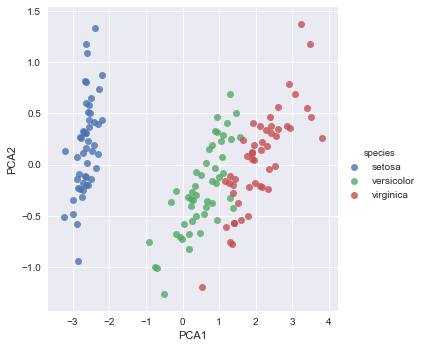

In [26]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1","PCA2",hue='species', data=iris, fit_reg=False);

In [27]:
plt.show()

# Unsupervised Learning
## Iris Clustering

In [31]:
from sklearn.mixture  import GaussianMixture as GM
model = GM(n_components = 3, covariance_type = 'full')
model.fit(x_iris)
y_gmm = model.predict(x_iris)

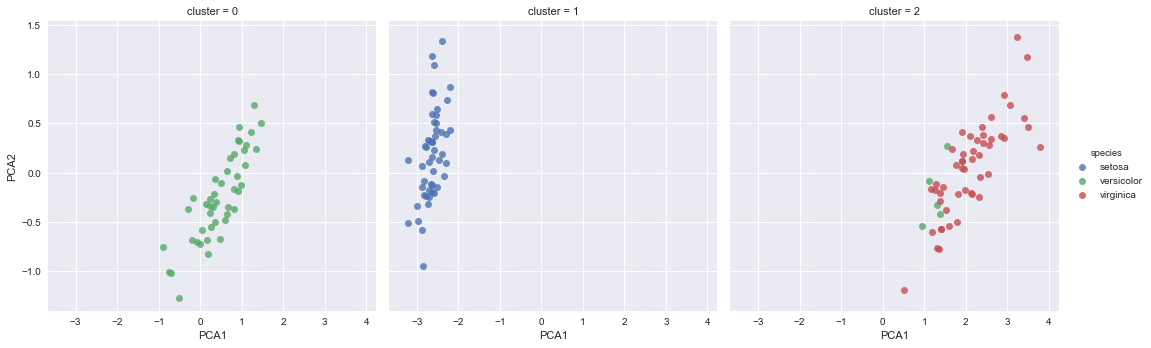

In [32]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1","PCA2",data=iris,hue='species',col='cluster',fit_reg=False)

# New Exercise:
## Handwritten Digits

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [2]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),transform=ax.transAxes,color='green')

In [3]:
plt.show()

<function matplotlib.pyplot.show>

In [4]:
x = digits.data
x.shape

(1797, 64)

In [5]:
y = digits.target
y.shape

(1797,)

In [8]:
#Transform data from from 3 dimensions to 2 dimensions
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

In [14]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digits_label', ticks=range(10))
plt.clim(-0.5,9.5)

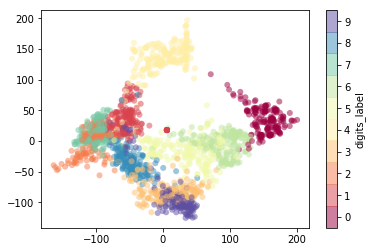

In [15]:
plt.show()